<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Seismic Tomography - simple example of perfect tomography</div>
        </div>
    </div>
</div>

##### Authors:
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))

## Basic Equations
### Inverse Problem
The process of predicting (or estimating) the numerical vales of a set of model parameters $\textbf{m}$ of an assumed model based on observation $\textbf{d}$.

Let us suppose, we have measured the data (travel times) on the Earth's surface. We want to find a set of model parameters (slowness). Then we formulate the forward problem as

$$
\textbf{d} = \textbf{G}\textbf{m}
$$

Where $\textbf{G}$ is a system matrix.

In order to find $\textbf{m}$, in this exercise solve normal equation. Normal equation is given by

$$
\textbf{G}^{T}\textbf{Gm} = \textbf{G}^{T}\textbf{d}
$$

We solve the normal equation to get $\textbf{m}$
$$
\textbf{m} = (\textbf{G}^{T}\textbf{G})^{-|} \textbf{G}^{T}\textbf{d}
$$

And, the resolution matrix is given by
$$
\textbf{res} = (\textbf{G}^{T}\textbf{G})^{-|} \textbf{G}^{T}\textbf{G}
$$

In [32]:
# important stuff, run at the very beginning

import numpy as np
import matplotlib.pyplot as plt

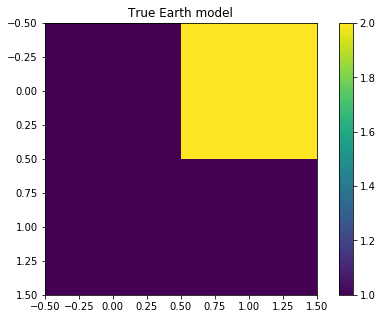

[ 3.          2.          4.24264069  2.82842712  2.          3.        ] [ 3.          2.          4.24264069  2.82842712  2.          3.        ]
 Forward operator to generate data 
[ 2.          3.          4.24264069  2.82842712  3.          2.        ]
 Explicit calculation of data 
[ 3.          2.          4.24264069  2.82842712  2.          3.        ]


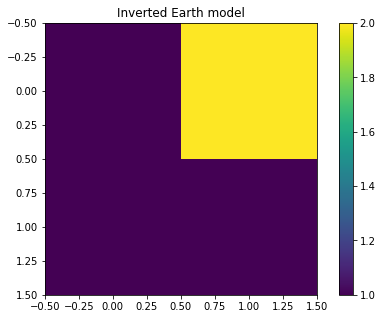

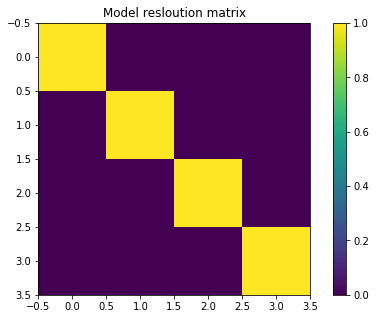

In [31]:
# dimension of the quadratic Earth model
n = 2

# True earth model initialization (slowness)
m = np.ones((n,n))
m[0][1] = 2.0                     # cahange one value in the array

# side length
l = 1                             # length that wave travels in our modell
s = np.sqrt(2)

# plot earth model
plt.figure(figsize=(8,5))
plt.imshow(m)
plt.title('True Earth model')
plt.colorbar()
plt.show()

# Generate data
# data are the traveltimes across the domains according to specific paths

t = np.zeros(6)
t[0] = l * (m[0][0]+m[0][1])       # i.e. t = distance * slowness    
t[1] = l * (m[1][0]+m[1][1])
t[2] = l * s * (m[1][0]+m[0][1])
t[3] = l * s * (m[0][0]+m[1][1])
t[4] = l * (m[0][0]+m[1][0])
t[5] = l * (m[0][1]+m[1][1])

# end generating true data
# setting up inverse problem
# system matrix G                 # remember G matrix from presentaiton the partial derivative matrix

G = np.array(l * [[1, 0, 1, 0],\
                  [0, 1, 0, 1],\
                  [0, s, s ,0],\
                  [s, 0, 0, s],\
                  [1, 1, 0, 0],\
                  [0, 0, 1, 1]])

# reshape m                        # because we need to multiply G (6 x 4 matrix) by slownes vector (4 x 1)
s = np.zeros(4)
ii = 0
for i in range (0,n):
    for j in range(0,n):
        s[ii]=m[i][j]
        ii = ii+1

# Test forward operator
print(' Forward operator to generate data ')
print(G.dot(s))
print(' Explicit calculation of data ')
print(t)

# solve inverse problem
# following code is equivalent to solving normal equation 
# inv(G' * G) * G' * t 

mest = ((np.linalg.inv(G.transpose().dot(G))).dot(G.transpose())).dot(t)

# plot earth model
plt.figure(figsize=(8,5))
plt.imshow((np.reshape(mest,(2,2))).transpose())
plt.title('Inverted Earth model')
plt.colorbar()
plt.show()

# calculation of model resolution matrix
# following code is equivalent of inv(G' * G) * G' * G

mres = ((np.linalg.inv(G.transpose().dot(G))).dot(G.transpose())).dot(G)

plt.figure(figsize=(8,5))
plt.imshow(mres)
plt.title('Model resloution matrix')
plt.colorbar()
plt.show()